# Ground State calculation
## PW calculation along with Band structure
 

In [1]:
import matplotlib.pyplot as plt
# change defaults to make plots bigger
plt.rcParams['figure.figsize'] = [8, 6]
plt.rcParams['figure.dpi'] = 100 # 200 dpi is really fine, but slower (i.e. for publication)

In [2]:
from ase.spacegroup import crystal
from ase.visualize import view
from ase.io import read
from ase.build import bulk
from ase.optimize import BFGS
from ase.optimize import BFGSLineSearch
from gpaw import GPAW, PW, FermiDirac
import matplotlib.pyplot as plt
from ase.dft.dos import DOS
from ase.constraints import UnitCellFilter
from ase.build import mx2
from gpaw import *
from ase.constraints import StrainFilter
from gpaw.xc.vdw import VDWFunctional
vdw = VDWFunctional('vdW-DF2', Nalpha=24)

atoms=read('MoSWS.traj')
calc = GPAW(mode=PW(600),
            xc='vdW-DF2',
            nbands=70,
            convergence={'bands': -20},
            setups={'Mo, W': '6'},      
            parallel={'band': 1, 'domain': 1},
            occupations=FermiDirac(width=0.01),
            kpts={'size': (42, 42, 1), 'gamma': True})  
atoms.calc = calc
atoms.get_potential_energy()
calc.write('gs_new.gpw', mode='all')

#atoms, calc=restart('../thermoelectric/gs_new.gpw')

In [3]:
# OK, sanity checks on that calculation!
# What is the band-gap, and does it look sensible?
from ase.dft.bandgap import bandgap
gap, p1, p2 = bandgap(atoms.calc)
# Output is the gap in eV
# and from where the VBM in k-space is, and where the CBM is.
# From here you can appreciate whether the material is direct or not.

Gap: 1.246 eV
Transition (v -> c):
  (s=0, k=0, n=25, [-0.00, -0.00, 0.00]) -> (s=0, k=602, n=26, [0.33, 0.33, 0.00])


MCLC(a=3.18522, b=5.51751, c=14.5326, alpha=89.9892)
  Variant name: MCLC1
  Special point names: GNN1FF1F2F3II1LMXX1X2YY1Z
  Default path: GYFLI,I1ZF1,YX1,XGN,MG

  Special point coordinates:
    G   0.0000  0.0000  0.0000
    N   0.5000  0.0000  0.0000
    N1  0.0000 -0.5000  0.0000
    F   0.5000  0.5000  0.4995
    F1  0.5000  0.5000  0.5005
    F2 -0.5000 -0.5000  0.4995
    F3  0.5000 -0.5000  0.4995
    I   0.6667  0.3333  0.5000
    I1  0.3333 -0.3333  0.5000
    L   0.5000  0.5000  0.5000
    M   0.5000  0.0000  0.5000
    X   0.3333 -0.3333  0.0000
    X1  0.6667  0.3333  0.0000
    X2 -0.3333 -0.6667  0.0000
    Y   0.5000  0.5000  0.0000
    Y1 -0.5000 -0.5000  0.0000
    Z   0.0000  0.0000  0.5000



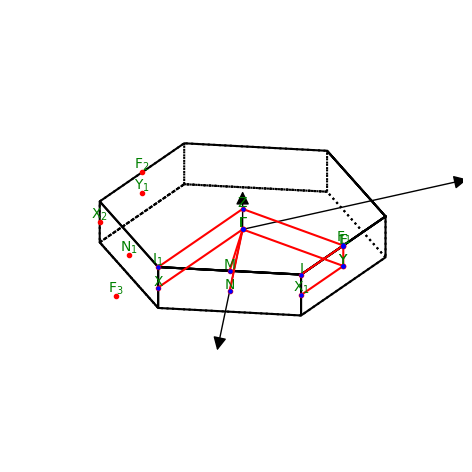

<Axes3DSubplot:>

In [4]:
# OK! Luckily ASE knows all about space groups and the reciprocal lattice.
# So let's ask it what it knows about this one, and a suggested high-symmetry path.
lat = atoms.cell.get_bravais_lattice()
print(lat.description())
lat.plot_bz(show=True)


  ___ ___ ___ _ _ _  
 |   |   |_  | | | | 
 | | | | | . | | | | 
 |__ |  _|___|_____|  22.8.0
 |___|_|             

User:   tewodros@tewodros-HP-Pavilion-Laptop-14-bf0xx
Date:   Thu Nov 20 11:47:21 2025
Arch:   x86_64
Pid:    11925
CWD:    /home/tewodros/Desktop/Hetrostructure/HTR/revised/HTR/1T_2H/MoS2-WS2/groundstate_calc
Python: 3.7.12
gpaw:   /home/tewodros/miniconda3/lib/python3.7/site-packages/gpaw
_gpaw:  /home/tewodros/miniconda3/lib/python3.7/site-packages/
        _gpaw.cpython-37m-x86_64-linux-gnu.so
ase:    /home/tewodros/miniconda3/lib/python3.7/site-packages/ase (version 3.22.1)
numpy:  /home/tewodros/miniconda3/lib/python3.7/site-packages/numpy (version 1.21.6)
scipy:  /home/tewodros/miniconda3/lib/python3.7/site-packages/scipy (version 1.7.3)
libxc:  5.2.3
units:  Angstrom and eV
cores: 1
OpenMP: True
OMP_NUM_THREADS: 1

Input parameters:
  convergence: {bands: -20,
                density: 0.0001,
                eigenstates: 4e-08,
                energy: 0.0005}
 

iter:   9 12:00:14  -384.785681c -6.76       c
iter:  10 12:01:20  -384.785681c -7.85c      c

Converged after 10 iterations.

Dipole moment: (2.270464, -3.503393, -0.007029) |e|*Ang

Energy contributions relative to reference atoms: (reference = -592362.216082)

Kinetic:        +50.939694
Potential:      -57.718427
External:        +0.000000
XC:            -378.019641
Entropy (-ST):   -0.000000
Local:           +0.012693
--------------------------
Free energy:   -384.785681
Extrapolated:  -384.785681

Showing only first 2 kpts
 Kpt  Band  Eigenvalues  Occupancy
  0    24      5.23051    2.00000
  0    25      5.78947    2.00000
  0    26      8.17659    0.00000
  0    27      8.17683    0.00000

  1    24      5.23006    2.00000
  1    25      5.77095    2.00000
  1    26      8.14411    0.00000
  1    27      8.21455    0.00000


Fermi level: 6.04270

Gap: 1.246 eV
Transition (v -> c):
  (s=0, k=0, n=25, [0.00, 0.00, 0.00]) -> (s=0, k=61, n=26, [0.33, 0.33, 0.00])


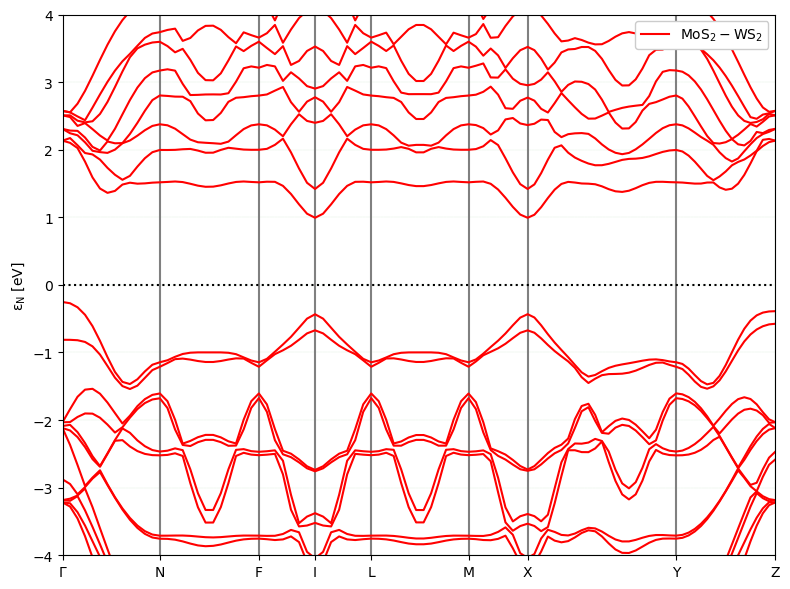

In [5]:
bs_calc = calc.fixed_density(kpts={'path': 'GNFILMXYZ', 'npoints': 100}, symmetry='off')
 # path through k-space taken from Materials project; or from analysis above

bs_calc.get_potential_energy() # eval at these k-point path
bs = bs_calc.band_structure().subtract_reference()
#bs=bs_calc.band_structure() # generate the plot object
#bs.ylabel(r'$\varepsilon_N(k)$ [eV]', size=24)
bs.plot(ylabel=r'$\mathrm{\varepsilon_N}$ [eV]', label=r'$\mathrm{MoS_{2}-WS_{2}}$', loc="upper right", color='r', emax=4, emin=-4)
plt.grid(which='major', axis='both', zorder=-1.0, color = 'green', linestyle = '--', linewidth = 0.05)
plt.tight_layout()
#plt.savefig('MoS2-WS2.eps')
plt.show()

In [6]:
# Get the accurate HOMO and LUMO from the band structure calculator
KS_gap, p1, p2 = bandgap(bs_calc)
#KS_gap, homo, lumo = bs_calc.get_homo_lumo()

Gap: 1.246 eV
Transition (v -> c):
  (s=0, k=0, n=25, [0.00, 0.00, 0.00]) -> (s=0, k=61, n=26, [0.33, 0.33, 0.00])


In [7]:
KS_gap

1.2461307977936569